In [77]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [78]:
mp = nltk.corpus.gutenberg.words("milton-paradise.txt")
mp

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]

In [79]:
text_Sentences = nltk.corpus.gutenberg.sents('milton-paradise.txt')[:10]
print(text_Sentences)

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ['Of', 'Man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit', 'Of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', ',', 'and', 'all', 'our', 'woe', ',', 'With', 'loss', 'of', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'and', 'regain', 'the', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'Of', 'Oreb', ',', 'or', 'of', 'Sinai', ',', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'In', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'of', 'Chaos', ':', 'or', ',', 'if', 'Sion', 'hill', 'Delight', 'thee', 'more', ',', 'and', 'Siloa', "'", 's', 'brook', 'that', 'flowed', 'Fast', 'by', 'the', 'oracle', 'of', 'God', ',', 'I', 'thence', 'Invoke', 'thy', 'aid', 'to', 'my', 'adventurous', 'song',

In [80]:
for sentence in text_Sentences:
    new_filtered_list = [word for word in sentence if word.isalnum()]
    print(new_filtered_list)

['Paradise', 'Lost', 'by', 'John', 'Milton', '1667']
['Book', 'I']
['Of', 'Man', 's', 'first', 'disobedience', 'and', 'the', 'fruit', 'Of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', 'and', 'all', 'our', 'woe', 'With', 'loss', 'of', 'Eden', 'till', 'one', 'greater', 'Man', 'Restore', 'us', 'and', 'regain', 'the', 'blissful', 'seat', 'Sing', 'Heavenly', 'Muse', 'that', 'on', 'the', 'secret', 'top', 'Of', 'Oreb', 'or', 'of', 'Sinai', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'In', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'of', 'Chaos', 'or', 'if', 'Sion', 'hill', 'Delight', 'thee', 'more', 'and', 'Siloa', 's', 'brook', 'that', 'flowed', 'Fast', 'by', 'the', 'oracle', 'of', 'God', 'I', 'thence', 'Invoke', 'thy', 'aid', 'to', 'my', 'adventurous', 'song', 'That', 'with', 'no', 'middle', 'flight', 'intends', 'to', 'soar', 'Above', 'th', 'Aonian', 'moun

In [81]:
tokenized_mp = word_tokenize(' '.join(mp))
tokenized_mp

['[',
 'Paradise',
 'Lost',
 'by',
 'John',
 'Milton',
 '1667',
 ']',
 'Book',
 'I',
 'Of',
 'Man',
 "'",
 's',
 'first',
 'disobedience',
 ',',
 'and',
 'the',
 'fruit',
 'Of',
 'that',
 'forbidden',
 'tree',
 'whose',
 'mortal',
 'taste',
 'Brought',
 'death',
 'into',
 'the',
 'World',
 ',',
 'and',
 'all',
 'our',
 'woe',
 ',',
 'With',
 'loss',
 'of',
 'Eden',
 ',',
 'till',
 'one',
 'greater',
 'Man',
 'Restore',
 'us',
 ',',
 'and',
 'regain',
 'the',
 'blissful',
 'seat',
 ',',
 'Sing',
 ',',
 'Heavenly',
 'Muse',
 ',',
 'that',
 ',',
 'on',
 'the',
 'secret',
 'top',
 'Of',
 'Oreb',
 ',',
 'or',
 'of',
 'Sinai',
 ',',
 'didst',
 'inspire',
 'That',
 'shepherd',
 'who',
 'first',
 'taught',
 'the',
 'chosen',
 'seed',
 'In',
 'the',
 'beginning',
 'how',
 'the',
 'heavens',
 'and',
 'earth',
 'Rose',
 'out',
 'of',
 'Chaos',
 ':',
 'or',
 ',',
 'if',
 'Sion',
 'hill',
 'Delight',
 'thee',
 'more',
 ',',
 'and',
 'Siloa',
 "'",
 's',
 'brook',
 'that',
 'flowed',
 'Fast',
 'by',

In [82]:
lemmatizer = WordNetLemmatizer()
sw = set(nltk.corpus.stopwords.words('english'))
lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in tokenized_mp]
lemmatized_word_counts = Counter(lemmatized_words)
common_words = lemmatized_word_counts.most_common(20)
print(common_words)

[(',', 10228), ('and', 3395), ('the', 2968), (';', 2326), ('to', 2228), ('of', 2050), ('in', 1366), ('.', 1283), ('his', 1170), ('with', 1160), ('a', 1109), (':', 771), ('or', 715), ('that', 704), ('all', 700), ('from', 686), ('not', 644), ("'", 606), ('their', 595), ('i', 590)]


In [83]:
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

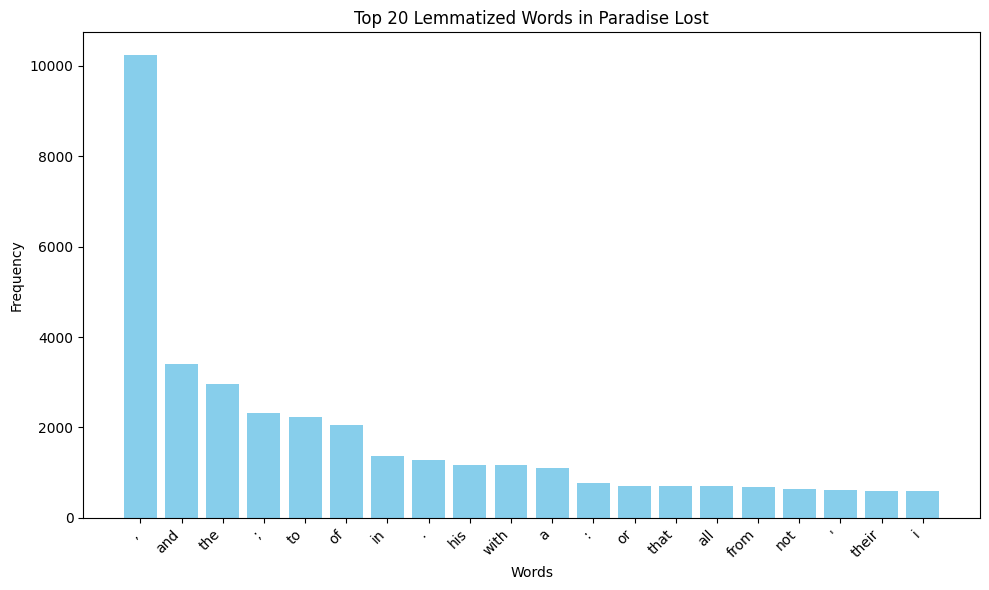

In [84]:
words = [word[0] for word in common_words]
counts = [word[1] for word in common_words]

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Lemmatized Words in Paradise Lost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [85]:
sentences = tokenized_mp[:100]
print(sentences)

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']', 'Book', 'I', 'Of', 'Man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit', 'Of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', ',', 'and', 'all', 'our', 'woe', ',', 'With', 'loss', 'of', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'and', 'regain', 'the', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'Of', 'Oreb', ',', 'or', 'of', 'Sinai', ',', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'In', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'of', 'Chaos', ':', 'or', ',', 'if']


In [86]:
analyzer = SentimentIntensityAnalyzer()
sentiment = analyzer.polarity_scores(sentences)
print(sentiment)

AttributeError: 'list' object has no attribute 'encode'

In [ ]:
sentiments = []
compound = sentiment ['compound']
pos = sentiment['pos']
neg = sentiment['neg']
neu = sentiment['neu']

sentiments.append({
    "text": text,
    "compound": compound,
    "positive": pos,
    "negative": neg,
    "neutral": neu
})